# Introduction

Goals:

* Identify IMGT residue positions that make contact with the TCR
  * See what loops those correspond to on the TCR side of things

In [1]:
import glob
import os
import itertools
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from python_pdb.parsers import parse_pdb_to_pandas
from tcr_structure_tools.cdr_numbering import assign_cdr_number

In [2]:
DATA_DIR = '/ceph/project/koohylab/bmcmaste/projects/tcr-pmhc-interface-analysis/data/apo-holo-mhc-class-I_refined_aligned'

In [3]:
holo_files = glob.glob('**/*holo*.pdb', root_dir=DATA_DIR, recursive=True)

In [4]:
CUTOFF_DISTANCE = 5

contacts = []

for path in holo_files:
    print(path)
    chains = path.split('/')[-1].split('_')[1]
    
    chain_annotations = {
        chains[0]: 'alpha_chain',
        chains[1]: 'beta_chain',
        chains[2]: 'antigen_chain',
        chains[3]: 'mhc_chain',
    }
    
    with open(os.path.join(DATA_DIR, path), 'r') as fh:
        df = parse_pdb_to_pandas(fh.read())
    
    
    df['chain_type'] = df['chain_id'].map(lambda chain_id: chain_annotations[chain_id])
    df['cdr'] = df['residue_seq_id'].map(assign_cdr_number) 
    
    mhc_interface_df = df.query("chain_type == 'mhc_chain' and residue_seq_id < 1090")
    tcr_cdrs_df = df.query("(chain_type == 'alpha_chain' or chain_type == 'beta_chain') and cdr.notnull()") 
    
    interface = tcr_cdrs_df.merge(mhc_interface_df, how='cross', suffixes=('_tcr', '_mhc'))
    
    interface['distance'] = np.sqrt(np.square(interface['pos_x_tcr'] - interface['pos_x_mhc'])
                                    + np.square(interface['pos_y_tcr'] - interface['pos_y_mhc'])
                                    + np.square(interface['pos_z_tcr'] - interface['pos_z_mhc']))

    c = interface.query('distance < @CUTOFF_DISTANCE').copy()
    c['path'] = path
    
    contacts.append(c)

contacts = pd.concat(contacts)
contacts

YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGAGGADTQY/7n1e_DECA_holo.pdb
NIATNDY-GYKTK-LVGEILDNFNKFY-MDHEN-SYDVKM-ASSQRQEGDTQY/6avf_ABPH_holo.pdb
DRGSQS-IYSNGD-GTYNQGGKLI-MNHEY-SMNVEV-ASSGASHEQY/3vxu_DECA_holo.pdb
DRGSQS-IYSNGD-GTYNQGGKLI-MNHEY-SMNVEV-ASSGASHEQY/3w0w_DECA_holo.pdb
NSASQS-VYSSG-VVQPGGYQKVT-MNHNS-SASEGT-ASSEGLWQVGDEQY/6vrm_DEPA_holo.pdb
YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGGTLY/1g6r_ABPH_holo.pdb
YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGGTLY/2ckb_CDQI_holo.pdb
YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGGTLY/1mwa_ABPH_holo.pdb
YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGGTLY/2oi9_BCQA_holo.pdb
DRGSQS-IYSNGD-AVRTNSGYALN-QGHDT-YYEEEE-ASSDTVSYEQY/5nmf_DECA_holo.pdb
DRGSQS-IYSNGD-AVRTNSGYALN-QGHDT-YYEEEE-ASSDTVSYEQY/5nmg_DECA_holo.pdb
DRGSQS-IYSNGD-AVRTNSGYALN-QGHDT-YYEEEE-ASSDTVSYEQY/5nme_IJHF_holo.pdb
DRGSQS-IYSNGD-AVNRDDKII-SEHNR-FQNEAQ-ASSPDIEQY/7n1f_DECA_holo.pdb
DRGSQS-IYSNGD-AVNRDDKII-SEHNR-FQNEAQ-ASSPDIEQY/7rtr_DECA_holo.pdb
FLGSQS-TYREGD-AVNDGGRLT-GTSN

,record_type_tcr,atom_number_tcr,atom_name_tcr,alt_loc_tcr,residue_name_tcr,chain_id_tcr,residue_seq_id_tcr,residue_insert_code_tcr,pos_x_tcr,pos_y_tcr,...,pos_y_mhc,pos_z_mhc,occupancy_mhc,b_factor_mhc,element_mhc,charge_mhc,chain_type_mhc,cdr_mhc,distance,path
53859,ATOM,2542,CA,None,GLU,D,38,None,10.182,34.008,...,32.996,31.556,1.0,34.32,N,None,mhc_chain,NaN,4.967900,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...
58241,ATOM,2545,CB,None,GLU,D,38,None,9.603,34.437,...,31.943,32.358,1.0,31.04,C,None,mhc_chain,NaN,4.844380,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...
58242,ATOM,2545,CB,None,GLU,D,38,None,9.603,34.437,...,32.996,31.556,1.0,34.32,N,None,mhc_chain,NaN,3.913324,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...
59702,ATOM,2546,CG,None,GLU,D,38,None,8.426,35.386,...,31.943,32.358,1.0,31.04,C,None,mhc_chain,NaN,4.837563,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...
59703,ATOM,2546,CG,None,GLU,D,38,None,8.426,35.386,...,32.996,31.556,1.0,34.32,N,None,mhc_chain,NaN,3.641064,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462053,ATOM,2217,OH,None,TYR,B,114,None,8.480,-36.207,...,-36.583,-48.874,1.0,56.84,C,None,mhc_chain,NaN,4.391614,DSAIYN-IQSSQRE-AQLNQAGTALI-MNHEY-SVGAGI-ASSYGT...
462054,ATOM,2217,OH,None,TYR,B,114,None,8.480,-36.207,...,-35.080,-49.026,1.0,63.06,C,None,mhc_chain,NaN,4.382755,DSAIYN-IQSSQRE-AQLNQAGTALI-MNHEY-SVGAGI-ASSYGT...
462055,ATOM,2217,OH,None,TYR,B,114,None,8.480,-36.207,...,-34.629,-50.046,1.0,81.70,C,None,mhc_chain,NaN,3.224564,DSAIYN-IQSSQRE-AQLNQAGTALI-MNHEY-SVGAGI-ASSYGT...
462056,ATOM,2217,OH,None,TYR,B,114,None,8.480,-36.207,...,-35.459,-50.456,1.0,90.08,O,None,mhc_chain,NaN,2.193649,DSAIYN-IQSSQRE-AQLNQAGTALI-MNHEY-SVGAGI-ASSYGT...


In [5]:
contacts['pdb_id'] = contacts['path'].map(lambda path: path.split('/')[-1].split('_')[0])

In [6]:
contacts['resi_mhc'] = contacts['residue_seq_id_mhc'].apply(str) + contacts['residue_insert_code_mhc'].fillna('')
contacts['resi_tcr'] = contacts['residue_seq_id_tcr'].apply(str) + contacts['residue_insert_code_tcr'].fillna('')

In [7]:
contacts['cdr_name'] = 'CDR' \
    + contacts['cdr_tcr'].apply(int).apply(str) \
    + contacts['chain_type_tcr'].map(lambda chain_type: chain_type.split('_')[0])

/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


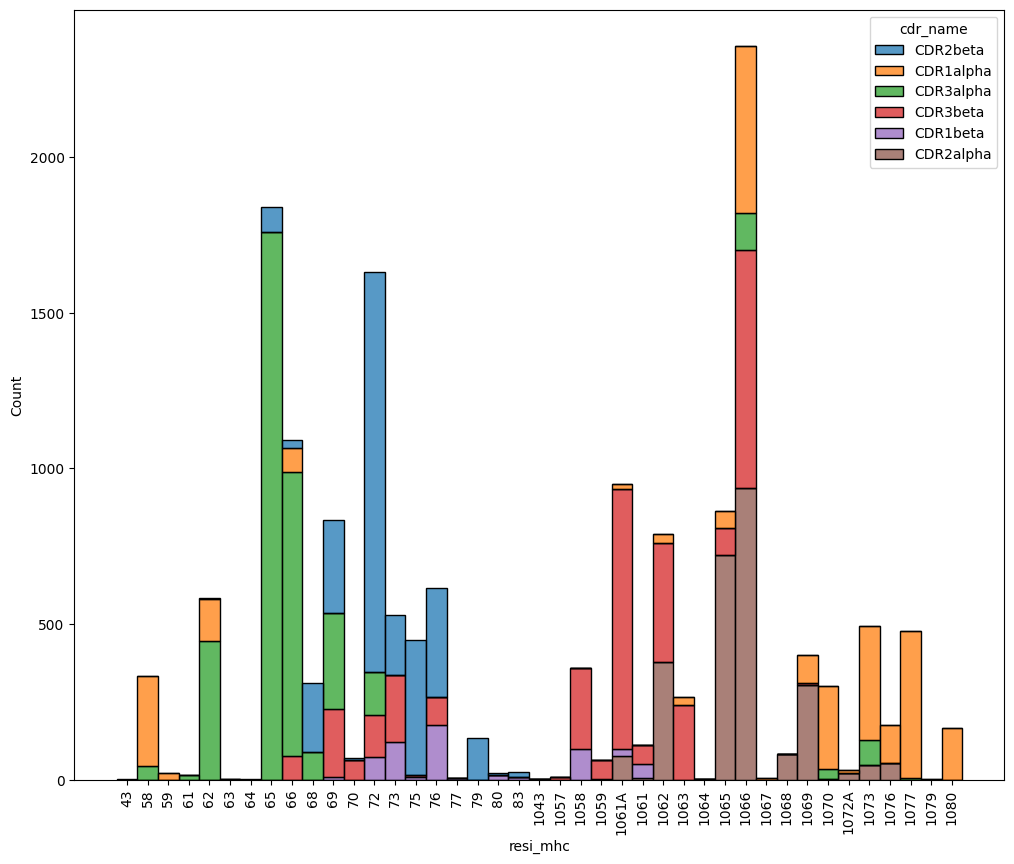

In [8]:
plt.figure(figsize=(12, 10))

sns.histplot(contacts.sort_values('residue_seq_id_mhc'), x='resi_mhc', hue='cdr_name', multiple='stack')
plt.xticks(rotation=90)
print()
# plt.savefig('figures/mhc-contacts.svg')

In [9]:
mhc_labels = contacts[['residue_seq_id_mhc', 'residue_insert_code_mhc', 'resi_mhc']].fillna('').sort_values(['residue_seq_id_mhc', 'residue_insert_code_mhc'])['resi_mhc'].unique().tolist()
tcr_labels = contacts[['residue_seq_id_tcr', 'residue_insert_code_tcr', 'resi_tcr']].fillna('').sort_values(['residue_seq_id_tcr', 'residue_insert_code_tcr'])['resi_tcr'].unique().tolist()

contacts['resi_mhc'] = pd.Categorical(contacts['resi_mhc'], mhc_labels)
contacts['resi_tcr'] = pd.Categorical(contacts['resi_tcr'], tcr_labels)

In [10]:
contacts['colour'] = contacts['cdr_name'].map({
    'CDR1alpha': 'DC91BE',
    'CDR2alpha': 'C0C0C2',
    'CDR3alpha': '6490C7',
    'CDR1beta': '963E87',
    'CDR2beta': '636363',
    'CDR3beta': '56BBD3',
}).str.lower()

In [11]:
palette = ['#' + colour.lower() for colour in ['DC91BE','C0C0C2', '6490C7', '963E87','2D2E62','56BBD3']]

In [12]:
contacts['cdr_name'] = pd.Categorical(contacts['cdr_name'], ['CDR1alpha', 'CDR2alpha', 'CDR3alpha', 'CDR1beta', 'CDR2beta', 'CDR3beta'])

/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


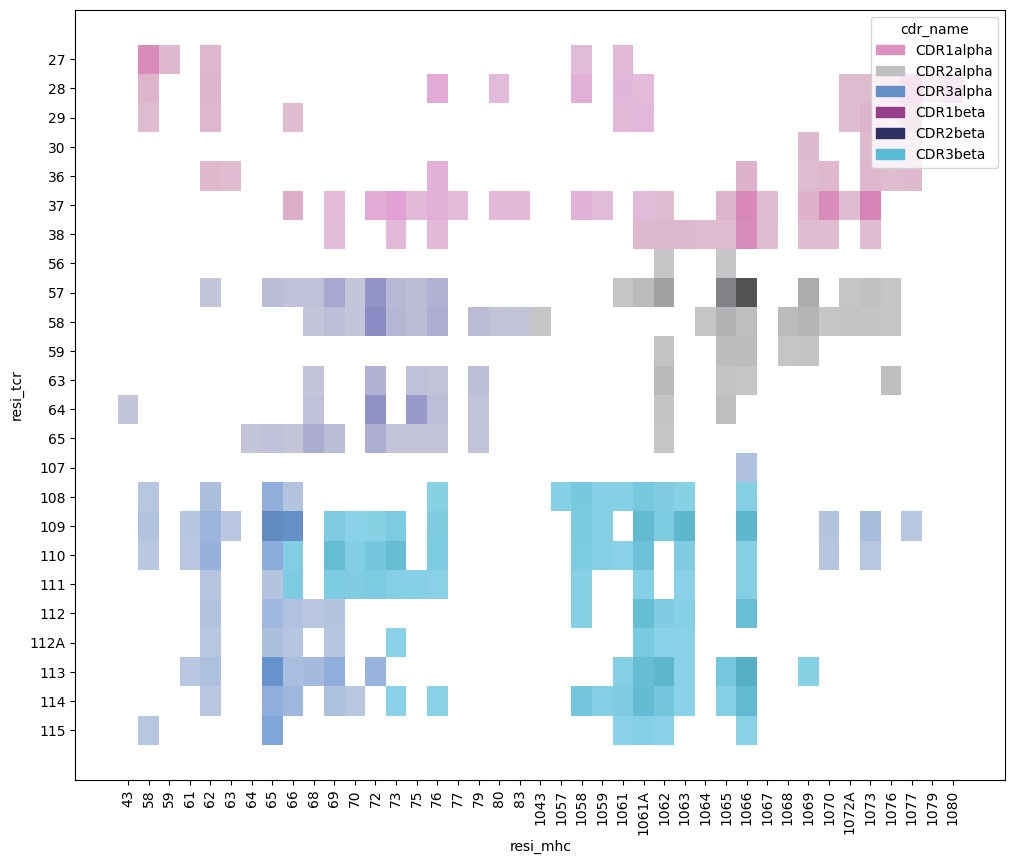

In [13]:
plt.figure(figsize=(12, 10))

sns.histplot(contacts, x='resi_mhc', y='resi_tcr', hue='cdr_name', palette=sns.color_palette(palette, 6))
plt.xticks(rotation=90)
print()
# plt.savefig('figures/mhc-contacts-heatmap.svg')

## Export Contact positions

Using a threshold of 200 contacts to include the position as a contact position.

In [14]:
contacts['resi_mhc'].value_counts()[contacts['resi_mhc'].value_counts() > 200].index.tolist()

['1066',
 '65',
 '72',
 '66',
 '1061A',
 '1065',
 '69',
 '1062',
 '76',
 '62',
 '73',
 '1073',
 '1077',
 '75',
 '1069',
 '1058',
 '58',
 '68',
 '1070',
 '1063']

In [15]:
contacts.to_csv(os.path.join(DATA_DIR, 'contacts.csv'))

# Holistic

Trying if keeping all information makes for better plots...

In [16]:
interfaces = []

for path in holo_files:
    print(path)
    chains = path.split('/')[-1].split('_')[1]
    
    chain_annotations = {
        chains[0]: 'alpha_chain',
        chains[1]: 'beta_chain',
        chains[2]: 'antigen_chain',
        chains[3]: 'mhc_chain',
    }
    
    with open(os.path.join(DATA_DIR, path), 'r') as fh:
        df = parse_pdb_to_pandas(fh.read())
    
    
    df['chain_type'] = df['chain_id'].map(lambda chain_id: chain_annotations[chain_id])
    df['cdr'] = df['residue_seq_id'].map(assign_cdr_number) 
    
    mhc_interface_df = df.query("chain_type == 'mhc_chain' and residue_seq_id < 1090")
    tcr_cdrs_df = df.query("(chain_type == 'alpha_chain' or chain_type == 'beta_chain') and cdr.notnull()") 
    
    interface = tcr_cdrs_df.merge(mhc_interface_df, how='cross', suffixes=('_tcr', '_mhc'))
    
    interface['distance'] = np.sqrt(np.square(interface['pos_x_tcr'] - interface['pos_x_mhc'])
                                    + np.square(interface['pos_y_tcr'] - interface['pos_y_mhc'])
                                    + np.square(interface['pos_z_tcr'] - interface['pos_z_mhc']))

    interface['path'] = path
    interfaces.append(interface)

interfaces = pd.concat(interfaces)
interfaces

YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGAGGADTQY/7n1e_DECA_holo.pdb
NIATNDY-GYKTK-LVGEILDNFNKFY-MDHEN-SYDVKM-ASSQRQEGDTQY/6avf_ABPH_holo.pdb
DRGSQS-IYSNGD-GTYNQGGKLI-MNHEY-SMNVEV-ASSGASHEQY/3vxu_DECA_holo.pdb
DRGSQS-IYSNGD-GTYNQGGKLI-MNHEY-SMNVEV-ASSGASHEQY/3w0w_DECA_holo.pdb
NSASQS-VYSSG-VVQPGGYQKVT-MNHNS-SASEGT-ASSEGLWQVGDEQY/6vrm_DEPA_holo.pdb
YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGGTLY/1g6r_ABPH_holo.pdb
YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGGTLY/2ckb_CDQI_holo.pdb
YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGGTLY/1mwa_ABPH_holo.pdb
YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGGTLY/2oi9_BCQA_holo.pdb
DRGSQS-IYSNGD-AVRTNSGYALN-QGHDT-YYEEEE-ASSDTVSYEQY/5nmf_DECA_holo.pdb
DRGSQS-IYSNGD-AVRTNSGYALN-QGHDT-YYEEEE-ASSDTVSYEQY/5nmg_DECA_holo.pdb
DRGSQS-IYSNGD-AVRTNSGYALN-QGHDT-YYEEEE-ASSDTVSYEQY/5nme_IJHF_holo.pdb
DRGSQS-IYSNGD-AVNRDDKII-SEHNR-FQNEAQ-ASSPDIEQY/7n1f_DECA_holo.pdb
DRGSQS-IYSNGD-AVNRDDKII-SEHNR-FQNEAQ-ASSPDIEQY/7rtr_DECA_holo.pdb
FLGSQS-TYREGD-AVNDGGRLT-GTSN

,record_type_tcr,atom_number_tcr,atom_name_tcr,alt_loc_tcr,residue_name_tcr,chain_id_tcr,residue_seq_id_tcr,residue_insert_code_tcr,pos_x_tcr,pos_y_tcr,...,pos_y_mhc,pos_z_mhc,occupancy_mhc,b_factor_mhc,element_mhc,charge_mhc,chain_type_mhc,cdr_mhc,distance,path
0,ATOM,2506,N,None,TYR,D,27,None,18.828,30.029,...,2.326,38.744,1.0,53.39,N,None,mhc_chain,NaN,38.290261,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...
1,ATOM,2506,N,None,TYR,D,27,None,18.828,30.029,...,3.288,39.739,1.0,54.87,C,None,mhc_chain,NaN,38.283065,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...
2,ATOM,2506,N,None,TYR,D,27,None,18.828,30.029,...,4.710,39.392,1.0,51.81,C,None,mhc_chain,NaN,36.911975,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...
3,ATOM,2506,N,None,TYR,D,27,None,18.828,30.029,...,4.965,38.303,1.0,44.64,O,None,mhc_chain,NaN,35.956630,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...
4,ATOM,2506,N,None,TYR,D,27,None,18.828,30.029,...,5.637,40.318,1.0,51.41,N,None,mhc_chain,NaN,36.854621,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494877,ATOM,2240,OG1,None,THR,B,117,None,7.207,-40.999,...,-53.239,-22.077,1.0,101.46,O,None,mhc_chain,NaN,44.407760,DSAIYN-IQSSQRE-AQLNQAGTALI-MNHEY-SVGAGI-ASSYGT...
494878,ATOM,2240,OG1,None,THR,B,117,None,7.207,-40.999,...,-54.836,-24.591,1.0,97.30,C,None,mhc_chain,NaN,42.260833,DSAIYN-IQSSQRE-AQLNQAGTALI-MNHEY-SVGAGI-ASSYGT...
494879,ATOM,2240,OG1,None,THR,B,117,None,7.207,-40.999,...,-55.501,-25.931,1.0,92.63,C,None,mhc_chain,NaN,41.336210,DSAIYN-IQSSQRE-AQLNQAGTALI-MNHEY-SVGAGI-ASSYGT...
494880,ATOM,2240,OG1,None,THR,B,117,None,7.207,-40.999,...,-55.235,-26.934,1.0,88.90,C,None,mhc_chain,NaN,40.077534,DSAIYN-IQSSQRE-AQLNQAGTALI-MNHEY-SVGAGI-ASSYGT...


In [17]:
interfaces['pdb_id'] = interfaces['path'].map(lambda path: path.split('/')[-1].split('_')[0])

In [18]:
interfaces['resi_mhc'] = interfaces['residue_seq_id_mhc'].apply(str) + interfaces['residue_insert_code_mhc'].fillna('')
interfaces['resi_tcr'] = interfaces['residue_seq_id_tcr'].apply(str) + interfaces['residue_insert_code_tcr'].fillna('')

In [19]:
interfaces['cdr_name'] = 'CDR' \
    + interfaces['cdr_tcr'].apply(int).apply(str) \
    + interfaces['chain_type_tcr'].map(lambda chain_type: chain_type.split('_')[0])

In [20]:
interfaces['makes_contact'] = interfaces['distance'] < CUTOFF_DISTANCE

In [21]:
mhc_residue_positions = interfaces['resi_mhc'].unique().tolist()

position_counts = OrderedDict.fromkeys(mhc_residue_positions)

for position, count in interfaces.query('makes_contact == True')['resi_mhc'].value_counts().items():
    position_counts[position] = count
    
position_counts

OrderedDict([('1', None),
             ('2', None),
             ('3', None),
             ('4', None),
             ('5', None),
             ('6', None),
             ('7', None),
             ('8', None),
             ('9', None),
             ('10', None),
             ('11', None),
             ('12', None),
             ('13', None),
             ('14', None),
             ('15', None),
             ('16', None),
             ('17', None),
             ('18', None),
             ('19', None),
             ('20', None),
             ('21', None),
             ('22', None),
             ('23', None),
             ('24', None),
             ('25', None),
             ('26', None),
             ('27', None),
             ('28', None),
             ('29', None),
             ('30', None),
             ('31', None),
             ('32', None),
             ('33', None),
             ('34', None),
             ('35', None),
             ('36', None),
             ('37', None),
          

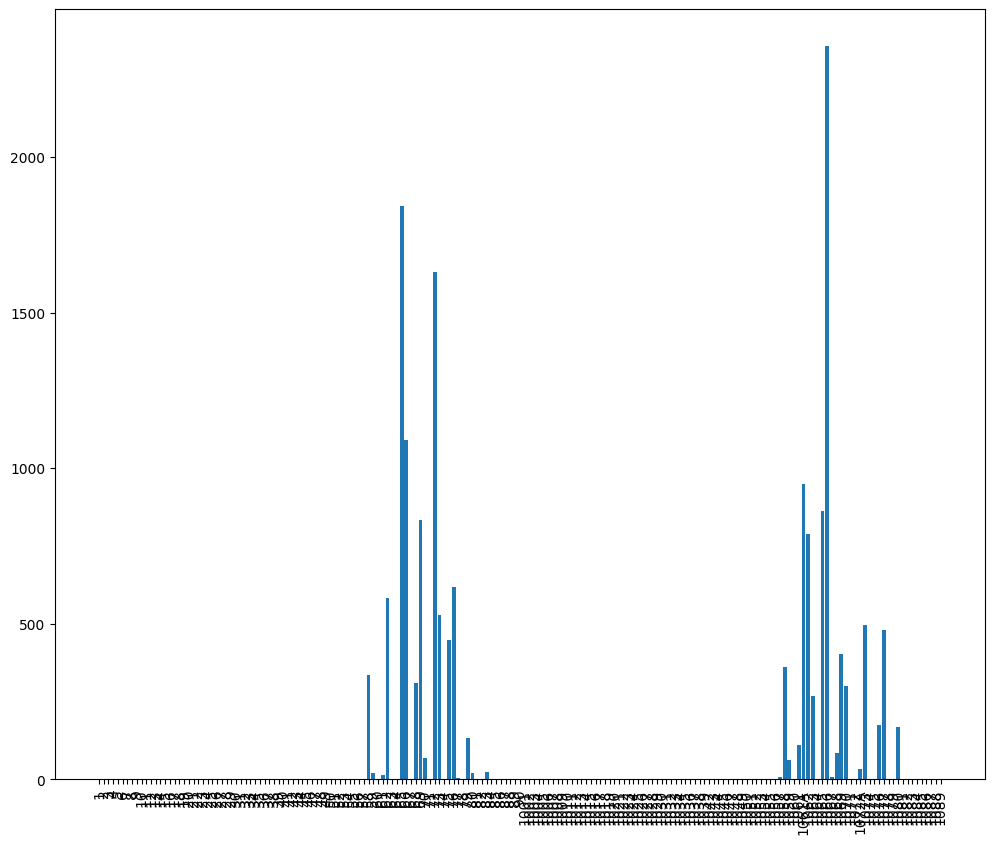

In [22]:
plt.figure(figsize=(12, 10))

positions = position_counts.keys()
occurences = [val if val else 0 for val in position_counts.values()]

plt.bar(positions, occurences)

plt.xticks(rotation=90)
print()

In [39]:
contacts.value_counts(['cdr_name', 'resi_mhc']).reset_index().to_csv('mhc_contacts.csv')